In [1]:
# 🚩 Step:2-1
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow.keras as keras
import extra_keras_datasets.emnist as emnist

%matplotlib inline

In [2]:
# 🚩 Step:2-2
# EMNIST-LettersのデータをNumPy形式で取得（評価用のデータだけを取得）
_, (v_images, v_labels) = emnist.load_data(type="letters")

# データ形式を4次元データ (batch, height, width, channel)に変換
# 各ピクセルの情報も0..255から0..1の範囲にノーマライズ
def adjust_image(img):
    img = img.astype("float32")
    img = img / 255.0
    img = img.reshape(-1, 28, 28, 1)  # 3D→4D
    return img


v_images = adjust_image(v_images)

In [3]:
# 🚩 Step:2-3
# 学習済みモデルの読み込み
model = keras.models.load_model("data/emnist-model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 64)        3

In [4]:
# 🚩 Step:2-4
# 評価用データを使ってモデルの評価
model.evaluate(v_images, v_labels)

650/650 [==============================] - 1s 2ms/step - loss: 0.1614 - accuracy: 0.9504


[0.16137677431106567, 0.9504327178001404]

In [5]:
# 🚩 Step:2-5
# 予測
predictions = model.predict(v_images)

# 予測結果の一部を確認
print(predictions[1])

[1.1746924e-31 1.0000000e+00 1.5736832e-11 4.1559515e-15 7.5538551e-12
 4.6010568e-17 6.8706818e-11 1.6009146e-08 3.3551920e-10 7.8673125e-13
 2.7522123e-12 9.9826570e-16 2.1609325e-12 7.2328560e-11 1.7929878e-11
 1.1966322e-13 3.7094483e-10 1.5813243e-09 2.5726044e-09 3.0500415e-13
 4.1723036e-12 8.2958422e-20 3.1592364e-21 8.9913639e-18 6.6447901e-15
 1.3307113e-14 7.6509919e-16]


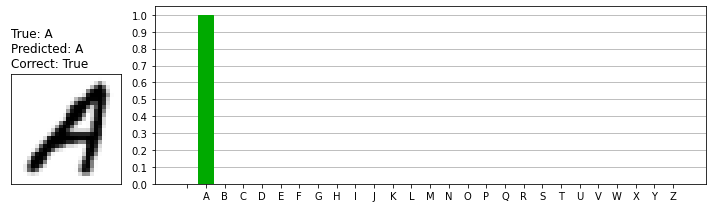

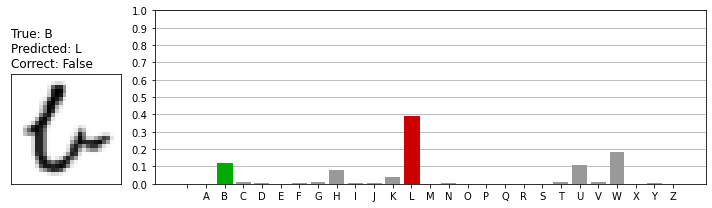

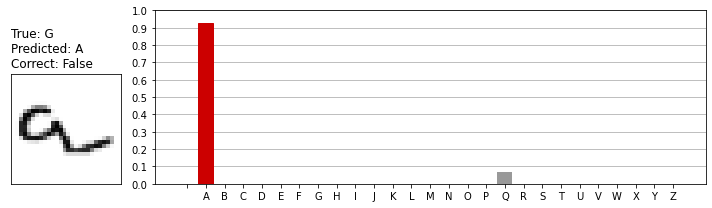

In [6]:
class_names = list(" ABCDEFGHIJKLMNOPQRSTUVWXYZ")
assert len(class_names) == 27  # EMNIST-Letters is 27-class

# 予測結果を分かりやすく表示
def show_prediction(i, predictions, images, true_labels):
    prediction, image, true_label = predictions[i], images[i], true_labels[i]
    predicted_label = np.argmax(prediction)

    plt.rcParams["font.size"] = 10
    fig, (ax1, ax2) = plt.subplots(
        1, 2, figsize=(10, 3), gridspec_kw={"width_ratios": [1, 5]}
    )

    label = "True: {}\nPredicted: {}\nCorrect: {}".format(
        class_names[true_label],
        class_names[predicted_label],
        true_label == predicted_label,
    )
    ax1.set_title(label, loc="left", fontsize=12)
    ax1.set_anchor("S")  # S=Bottom
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(image, cmap=plt.cm.binary)

    x_pos = np.arange(len(class_names))
    container = ax2.bar(x_pos, prediction, color="#999")
    container[predicted_label].set_color("#C00")  # 予測
    container[true_label].set_color("#0A0")  # 正解

    ax2.set_yticks(np.arange(0, 1.1, 0.1))
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(class_names)
    ax2.grid(True, axis="y")
    ax2.set_axisbelow(True)

    plt.tight_layout()
    plt.show()


# 🚩 Step:2-6
show_prediction(1, predictions, v_images, v_labels)
show_prediction(1000, predictions, v_images, v_labels)  # 複数候補が出る
show_prediction(5480, predictions, v_images, v_labels)  # 正解ラベルが微妙

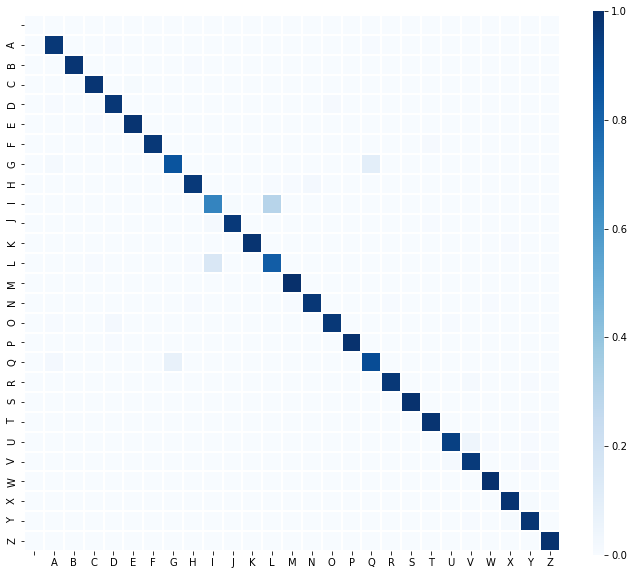

In [7]:
def show_confusion_matrix(predictions, true_labels, class_names):
    pred_labels = np.argmax(predictions, axis=1)
    cm = tf.math.confusion_matrix(true_labels, pred_labels)
    cm = cm / cm.numpy().sum(axis=1)[:, tf.newaxis]  # Normalize
    cm = np.nan_to_num(cm)

    plt.rcParams["font.size"] = 10
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        cm,
        vmin=0.0,
        vmax=1.0,
        cmap="Blues",
        cbar_kws={"aspect": 50},
        square=True,
        linewidths=1,
        xticklabels=class_names,
        yticklabels=class_names,
    )
    plt.show()


# 🚩 Step:2-7
# データ全体での結果を表示（混同行列：縦軸=正解ラベル、横軸=予測ラベル）
show_confusion_matrix(predictions, v_labels, class_names)